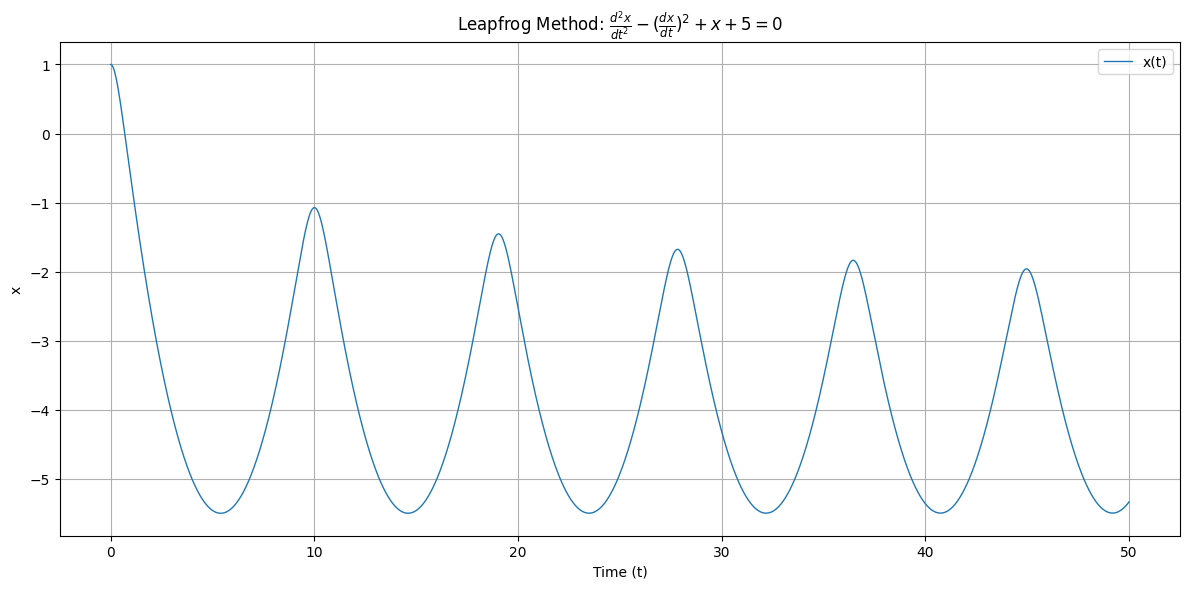

In [ ]:
#Solution of Assignment-10
#Instructor: Gopal Hazra
#Computational Physics-PHY617,
#Dept of Physics, IIT Kanpur


import numpy as np
import matplotlib.pyplot as plt


#Question-1

# Time parameters
dt = 0.001
t = np.arange(0, 50 + dt, dt)
n = len(t)

# Initialize arrays for x and velocity v = dx/dt
x = np.zeros(n)
v = np.zeros(n)

# Initial conditions
x[0] = 1
v[0] = 0

# Compute initial acceleration using the equation rearranged:
# d2x/dt2 = (dx/dt)^2 - x - 5
a0 = (v[0]**2) - x[0] - 5

# Estimate v at half-step for leapfrog
v_half = v[0] + 0.5 * dt * a0

# Leapfrog integration loop
for i in range(1, n):
    # Update position
    x[i] = x[i-1] + dt * v_half

    # Compute new acceleration
    a = (v_half**2) - x[i] - 5

    # Update velocity at next half-step
    v_half += dt * a

    # Estimate full-step velocity for plotting
    v[i] = v_half - 0.5 * dt * a

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='x(t)', linewidth=1)
plt.xlabel('Time (t)')
plt.ylabel('x')
plt.title('Leapfrog Method: $\\frac{d^2x}{dt^2} - (\\frac{dx}{dt})^2 + x + 5 = 0$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


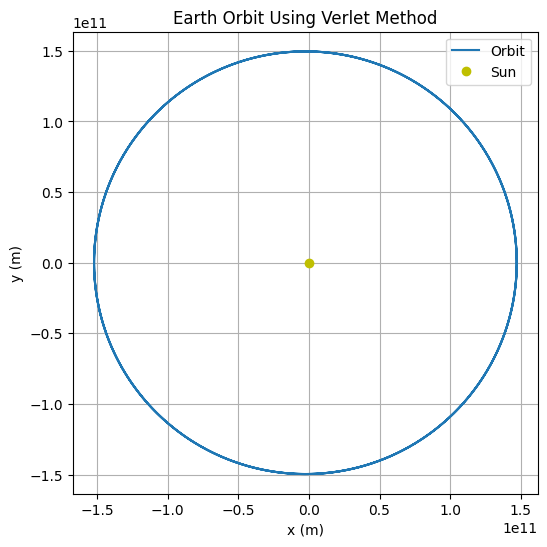

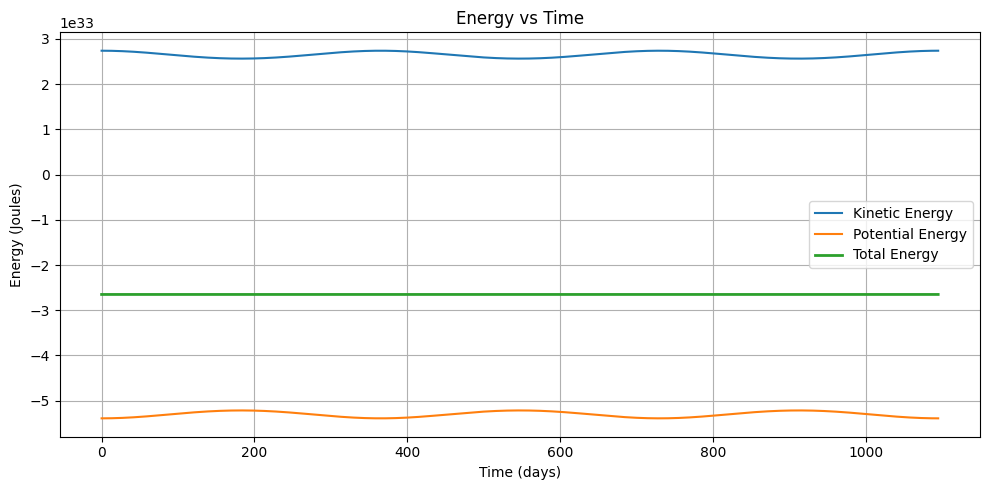

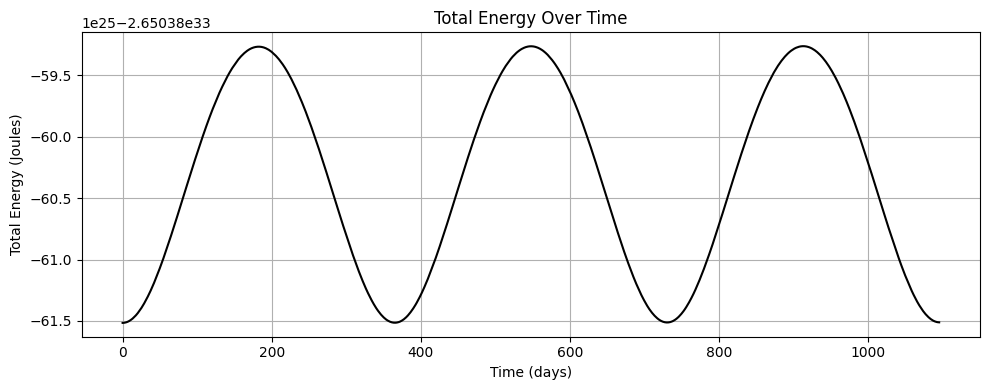

In [ ]:
#Question-2

import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.6738e-11  # gravitational constant (m^3 kg^-1 s^-2)
M = 1.9891e30   # mass of the Sun (kg)
m = 5.9722e24   # mass of the Earth (kg)

# Initial conditions
r0 = 1.4710e11  # initial distance (m)
v0 = 3.0287e4   # initial tangential velocity (m/s)

# Time settings
h = 3600  # time step in seconds (1 hour)
num_steps = int((365 * 24 * 3600) / h) * 3  # simulate 3 years

# Position and velocity arrays
r = np.zeros((num_steps, 2))
v = np.zeros((num_steps, 2))
a = np.zeros((num_steps, 2))

# Energy arrays
KE = np.zeros(num_steps)
PE = np.zeros(num_steps)
TE = np.zeros(num_steps)

# Initial state
r[0] = np.array([r0, 0])
v[0] = np.array([0, v0])
a[0] = -G * M * r[0] / np.linalg.norm(r[0])**3

# First step using Euler to start Verlet
r[1] = r[0] + h * v[0] + 0.5 * h**2 * a[0]

# Verlet integration
for i in range(1, num_steps - 1):
    a[i] = -G * M * r[i] / np.linalg.norm(r[i])**3
    r[i+1] = 2 * r[i] - r[i-1] + h**2 * a[i]
    v[i] = (r[i+1] - r[i-1]) / (2 * h)  # central difference velocity

    # Energies
    speed = np.linalg.norm(v[i])
    dist = np.linalg.norm(r[i])
    KE[i] = 0.5 * m * speed**2
    PE[i] = -G * M * m / dist
    TE[i] = KE[i] + PE[i]

# Final velocity
v[-1] = (r[-1] - r[-3]) / (2 * h)
speed = np.linalg.norm(v[-1])
dist = np.linalg.norm(r[-1])
KE[-1] = 0.5 * m * speed**2
PE[-1] = -G * M * m / dist
TE[-1] = KE[-1] + PE[-1]

# Time array for plotting
time = np.arange(num_steps) * h / (3600 * 24)  # in days

# Plot orbit
plt.figure(figsize=(6, 6))
plt.plot(r[:, 0], r[:, 1], label='Orbit')
plt.plot(0, 0, 'yo', label='Sun')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Earth Orbit Using Verlet Method')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# Plot energies
plt.figure(figsize=(10, 5))
plt.plot(time[1:-1], KE[1:-1], label='Kinetic Energy')
plt.plot(time[1:-1], PE[1:-1], label='Potential Energy')
plt.plot(time[1:-1], TE[1:-1], label='Total Energy', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Energy (Joules)')
plt.title('Energy vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot total energy alone
plt.figure(figsize=(10, 4))
plt.plot(time[1:-1], TE[1:-1], label='Total Energy', color='black')
plt.xlabel('Time (days)')
plt.ylabel('Total Energy (Joules)')
plt.title('Total Energy Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


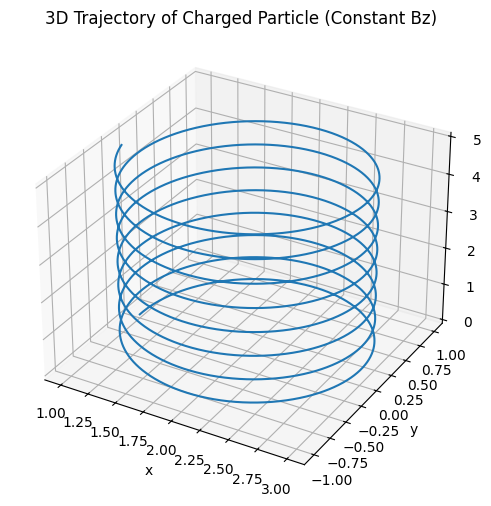

In [ ]:
#Question-3

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
q_over_m = 1.0
B = np.array([0, 0, 1])  # constant Bz field
E = np.array([0, 0, 0])  # no electric field

# Initial conditions: [x, y, z, vx, vy, vz]
y0 = [1.0, 0.0, 0.0, 0.0, 1.0, 0.1]

def lorentz(t, y):
    r = y[:3]
    v = y[3:]
    dvdt = q_over_m * (E + np.cross(v, B))
    return np.concatenate((v, dvdt))

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 10000)

# Solve
sol = solve_ivp(lorentz, t_span, y0, t_eval=t_eval)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Trajectory of Charged Particle (Constant Bz)')
plt.show()


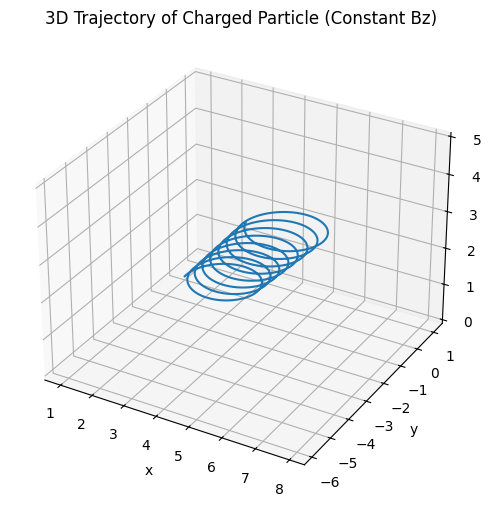

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
q_over_m = 1.0
B = np.array([0, 0, 1])  # constant Bz field
E = np.array([0.1, 0.1, 0]) # no electric field

# Initial conditions: [x, y, z, vx, vy, vz]
y0 = [1.0, 0.0, 0.0, 0.0, 1.0, 0.1]

def lorentz(t, y):
    r = y[:3]
    v = y[3:]
    dvdt = q_over_m * (E + np.cross(v, B))
    return np.concatenate((v, dvdt))

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 10000)

# Solve
sol = solve_ivp(lorentz, t_span, y0, t_eval=t_eval)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Trajectory of Charged Particle (Constant Bz)')
plt.show()


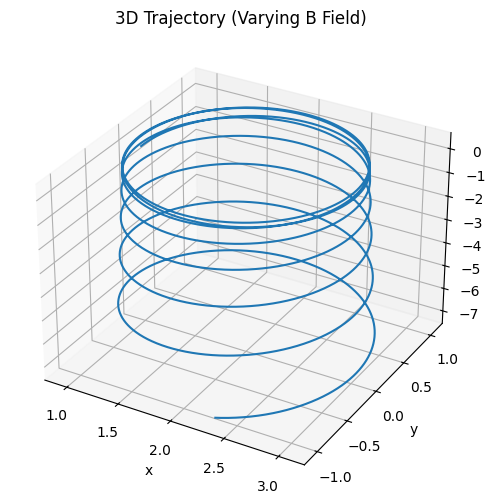

In [ ]:
def lorentz_varyingB(t, y):
    r = y[:3]
    v = y[3:]
    y_pos, z_pos = r[1], r[2]
    By = -0.02 * y_pos
    Bz = 1 + 0.02 * z_pos
    B = np.array([0, By, Bz])
    dvdt = q_over_m * (E + np.cross(v, B))
    return np.concatenate((v, dvdt))

E = np.array([0.1, 0.1, 0])
sol3 = solve_ivp(lorentz_varyingB, t_span, y0, t_eval=t_eval)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol3.y[0], sol3.y[1], sol3.y[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Trajectory (Varying B Field)')
plt.show()